**IA & Big Data**

Prof. Miguel Bozer da Silva - miguel.bozer@senaisp.edu.br

---

In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import seaborn as sns
import matplotlib.pyplot as plt

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

## Tarefa #1: Recebendo os dados

In [ ]:
# Recebendo os dados:
data_google_id = '1Jjf3OnYm12rgABJe9dsMs5m_Xz5HNaSl'
gdd(file_id=data_google_id,
    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
diabetes = pd.read_csv("dados.csv", sep = ',')

## Tarefa #2: Analise Exploratória dos Dados

Vamos ver informações gerais dos nossos dados:

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Podemos observar uma diferença significativa na escala dos dados quando comparamos a coluna `pedi` com a coluna `insu`. Um modelo de Aprendizado de Máquina **pode** se tornar tendencioso se essa diferença de escala continuar nos dados. Por isso, iremos ver os conceitos da **Normalização e Padronização dos Dados**

Antes disso, vamos explorar um pouco os dados fazendo um histrograma de todas as colunas numéricas e a contagem dos valores da coluna `class` do nosso conjunto de dados:

<Axes: xlabel='mass', ylabel='Count'>

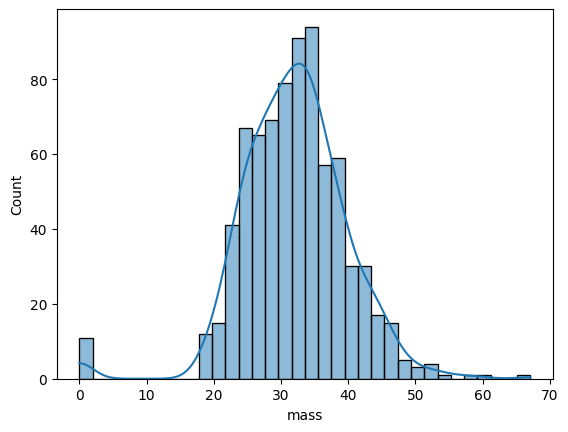

In [ ]:
sns.histplot(x=diabetes["mass"], kde= True)

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insu'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

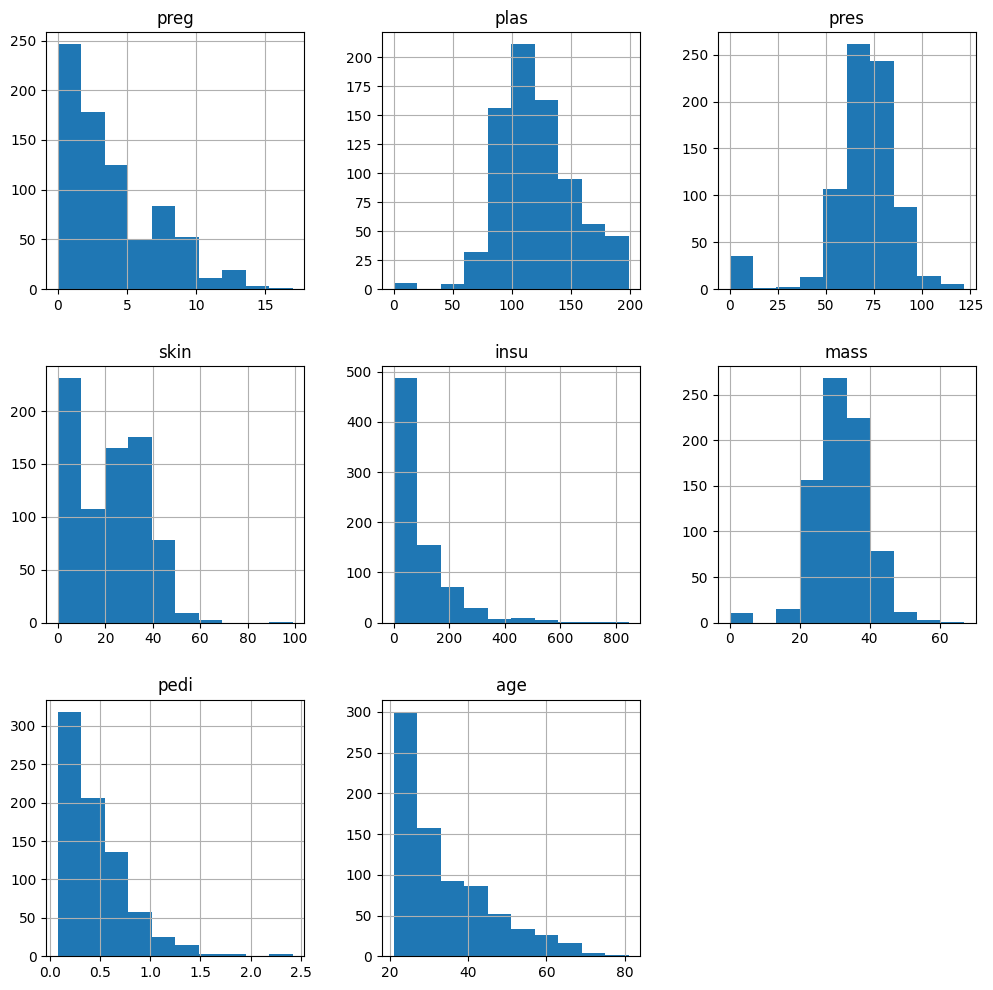

In [ ]:
diabetes.hist(figsize=(12,12))

<Axes: xlabel='class', ylabel='count'>

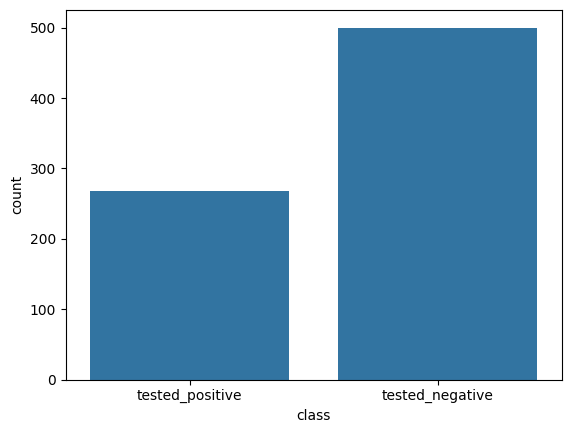

In [ ]:
sns.countplot(data=diabetes, x = 'class')

## Tarefa #3: Dividindo o conjunto de dados e Aplicando a Normalização OU Padronização

Vamos supor que desejamos criar um modelo para estimar se uma pessoa possui ou não diabetes

In [ ]:
# Dividindo x e y
# Foram excluídos as colunas que não seriam utilizadas
X = diabetes.drop(columns=['class'])
y = diabetes['class']

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)


In [ ]:
X_train.shape , y_train.shape

((537, 8), (537,))

In [ ]:
X_test.shape, y_test.shape

((231, 8), (231,))

Vamos aplicar a normalização e a padronização dos dados nas duas células a seguir:

In [ ]:
# Aplicando a normalização
# Encontrando os minimos e maximos de cada uma das nossas colunas
scaler = MinMaxScaler().fit(X_train)
# Mudando a escala dos dados
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
# Aplicando a Padronização dos Dados
# Encontrando os minimos e maximos de cada uma das nossas colunas
scaler = StandardScaler().fit(X_train)
# Mudando a escala dos dados
X_train_pad = scaler.transform(X_train)
X_test_pad = scaler.transform(X_test)

Vale a pena destacar que quando usamos o `MinMaxScaler().fit()` ou o `StandardScaler().fit(X_train)` para que fossem encontrados os mínimos e os máximos de cada uma das colunas ou a média e o desvio padrão de cada coluna respectivamente, passamos apenas a informação dos dados do conjunto de treinamento (`X_train`). As informações contidas no conjunto de teste (`X_test`) nunca devem influenciar o pré-processamento dos dados, pois estariamos obtendo informações de um conjunto de dados que não participa do treinamento.

Vamos agora verificar o que ocorreu com os dados quando aplicamos a normalização e a padronização. Para isso, iremos transformar os nossos dados em um DataFrame, apenas para facilitar a visualização dos dados:

In [ ]:
X_train_norm_df = pd.DataFrame(data=X_train_norm, columns=X_train.columns)
X_train_norm_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,0.058824,0.477387,0.491803,0.285714,0.068558,0.356185,0.077711,0.016667
1,0.294118,0.527638,0.590164,0.460317,0.384161,0.549925,0.034586,0.116667
2,0.000000,0.678392,0.557377,0.666667,0.295508,0.630402,0.122545,0.050000
3,0.235294,0.658291,0.557377,0.333333,0.196217,0.493294,0.035013,0.116667
4,0.058824,0.517588,0.245902,0.603175,0.098109,0.645306,0.044833,0.200000


In [ ]:
X_train_pad_df = pd.DataFrame(data=X_train_pad, columns=X_train.columns)
X_train_pad_df.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,-0.836294,-0.800051,-0.535764,-0.157146,-0.189732,-1.060153,-0.614216,-0.948610
1,0.390728,-0.490543,0.128044,0.553619,2.130203,0.646467,-0.909738,-0.434667
2,-1.143050,0.437979,-0.093226,1.393614,1.478536,1.355371,-0.306991,-0.777296
3,0.083972,0.314176,-0.093226,0.036699,0.748669,0.147609,-0.906812,-0.434667
4,-0.836294,-0.552445,-2.195284,1.135154,0.027491,1.486650,-0.839515,-0.006380


### Dados normalizados:

Text(0.5, 1.0, 'Após a Normalização')

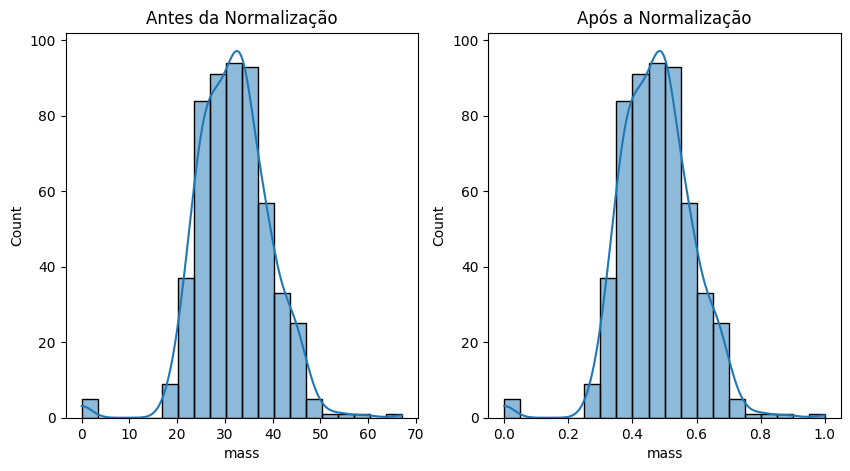

In [ ]:
#Definindo a região do plot do gráfico (1 linhas, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=X_train, x="mass", bins=20, kde = True, ax=axes[0])
sns.histplot(data=X_train_norm_df, x="mass", bins=20, kde = True, ax=axes[1])
axes[0].set_title("Antes da Normalização")
axes[1].set_title("Após a Normalização")

Podemos ver que a informação da distribuição dos dados não foi alterada antes e após a aplicação da normalização dos dados. Podemos observar apenas que os valores estão agora num intervalo de 0 até 1.

### Dados padronizados:

Text(0.5, 1.0, 'Após a Padronização')

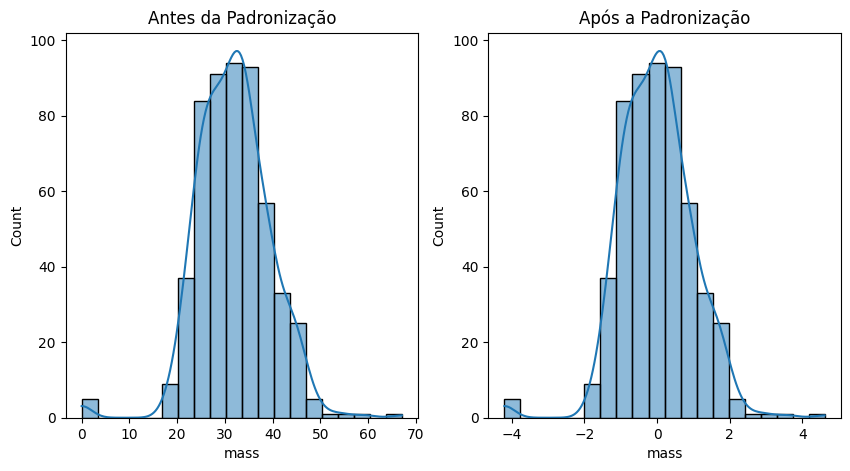

In [ ]:
#Definindo a região do plot do gráfico (1 linhas, 2 colunas)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=X_train, x="mass", bins=20, kde = True, ax=axes[0])
sns.histplot(data=X_train_pad_df, x="mass", bins=20, kde = True, ax=axes[1])
axes[0].set_title("Antes da Padronização")
axes[1].set_title("Após a Padronização")

Podemos ver que a informação da distribuição dos dados não foi alterada antes e após a aplicação da padronização dos dados. Podemos observar apenas que a média dos dados está centralizada em 0 e existem valores negativos nos nossos dados.

# Exercício)

Para o conjunto de dados Admission_Predict.csv aplique a normalização no conjunto de dados e faça um histograma para comparar os dados antes e após a normalização.

In [ ]:
# Seu código aqui

# Correção

## Tarefa #1: Recebendo os dados

In [ ]:
data_google_id = '1PZeqz1yguPzDqdIObHeqsk2mK6GOYix_'
gdd(file_id=data_google_id, # 'Data id único do meu arquivo no Drive'
    dest_path='./dados.csv', # dowload para pasta + arquivo
    showsize=True,
    overwrite=True)

0.0 B Done.


In [ ]:
admission = pd.read_csv("dados.csv", sep = ',')

In [ ]:
admission.head()

,Serial_num.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
admission.drop(columns=['Serial_num.'],
               inplace = True)

In [ ]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          400 non-null    int64  
 1   TOEFL_Score        400 non-null    int64  
 2   University_Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance             400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
# Dividindo os dados em Entrada (X) e saída (y)
X = admission.drop(columns=['Chance'])
y = admission['Chance']

# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
# Aplicando a normalização:
# instanciar um objeto de normalização
scaler = MinMaxScaler()
# Método para preparar os scaler para ajustar escala de dados com
# as colunas de X_train
scaler.fit(X_train)
# Mudando a escala dos dados:
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
X_train_norm_df = pd.DataFrame(data=X_train_norm,
                               columns=X_train.columns)
X_train_norm_df.head()

Text(0.5, 1.0, 'Após a Normalização')

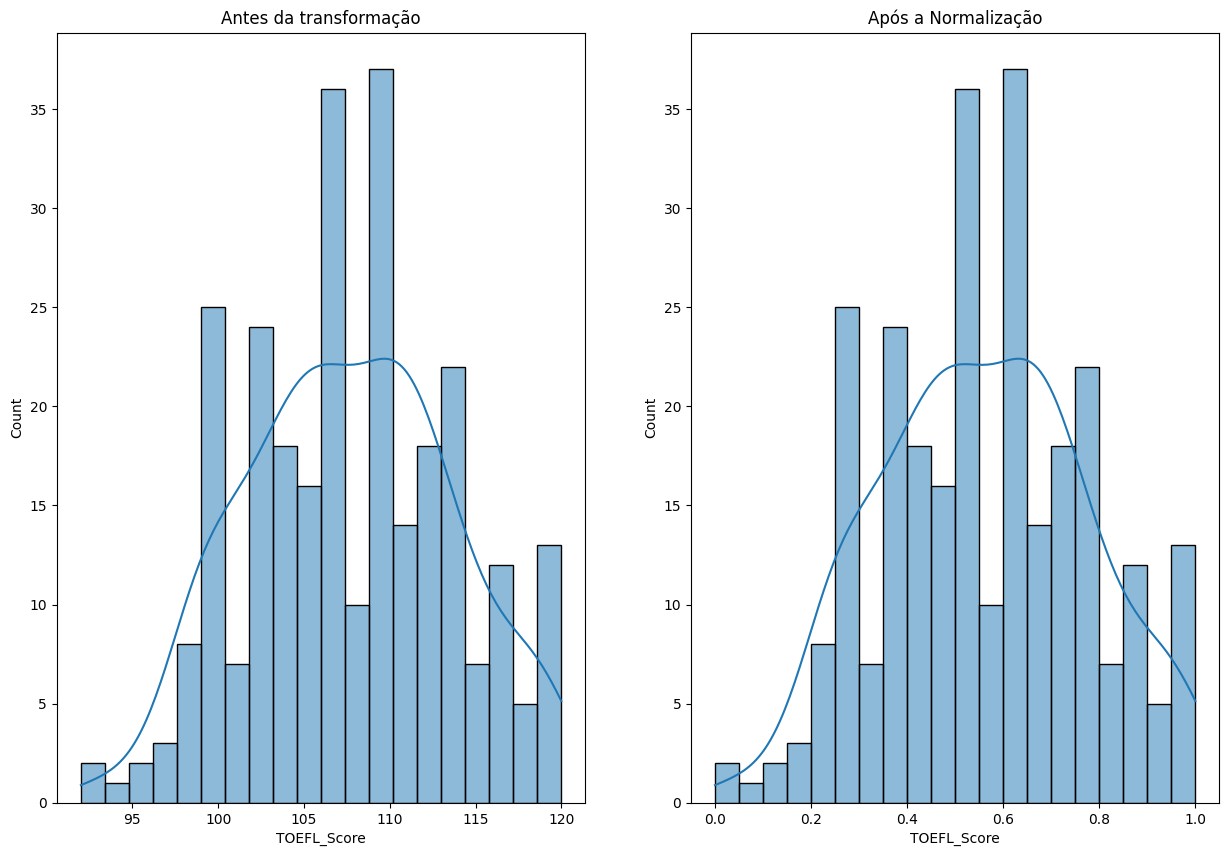

In [ ]:
# Gráfico com 2 linhas e 2 colunas
fig, eixo = plt.subplots(ncols=2, nrows=1, figsize=(15,10))
sns.histplot(data=X_train,
             x='TOEFL_Score',
             bins=20,
             kde=True,
             ax=eixo[0])
sns.histplot(data=X_train_norm_df,
             x='TOEFL_Score',
             bins=20,
             kde=True,
             ax=eixo[1])

eixo[0].set_title("Antes da transformação")
eixo[1].set_title("Após a Normalização")
